<a href="https://colab.research.google.com/github/tombackert/CS411-ml-for-ds/blob/main/Week_4_Handson_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Generate synthetic data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**3 + np.random.randn(100, 1) * 3  # Non-linear data with noise

In [5]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Fit linear model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

In [7]:
# RMSE for linear model
print(f'Linear Model Train RMSE: {mean_squared_error(y_train, y_pred_train, squared=False)}')
print(f'Linear Model Test RMSE: {mean_squared_error(y_test, y_pred_test, squared=False)}')

Linear Model Train RMSE: 5.24106333919561
Linear Model Test RMSE: 4.991674476145879


In [9]:
# Polynomial model (more complex)
poly = PolynomialFeatures(degree=5)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_poly_pred_train = poly_reg.predict(X_poly_train)
y_poly_pred_test = poly_reg.predict(X_poly_test)

In [10]:
# RMSE for polynomial model
print(f'Polynomial Model Train RMSE: {mean_squared_error(y_train, y_poly_pred_train, squared=False)}')
print(f'Polynomial Model Test RMSE: {mean_squared_error(y_test, y_poly_pred_test, squared=False)}')

Polynomial Model Train RMSE: 2.7572922276867198
Polynomial Model Test RMSE: 3.121474221402576


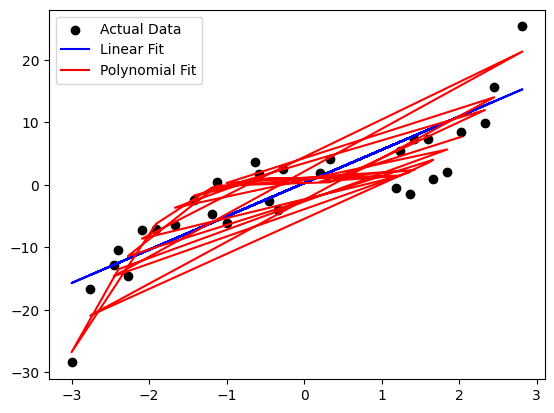

In [11]:
# Plot for visualization
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred_test, color='blue', label='Linear Fit')
plt.plot(X_test, y_poly_pred_test, color='red', label='Polynomial Fit')
plt.legend()
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Using the linear model for k-fold cross-validation
lin_reg = LinearRegression()

# 5-Fold Cross Validation
cv_scores = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

print(f'Cross-Validation RMSE Scores: {rmse_scores}')
print(f'Mean RMSE: {np.mean(rmse_scores)}')

Cross-Validation RMSE Scores: [7.5346333  6.70142764 3.01350791 7.35424736 7.28512863]
Mean RMSE: 6.377788968528292
